In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
d1=pd.read_csv("Datasets/Linear Regression/linearX.csv")
d2=pd.read_csv("Datasets/Linear Regression/linearY.csv")

In [8]:
print(d1.shape)
print(d2.shape)

(99, 1)
(99, 1)


In [9]:
x=d1.values
y=d2.values

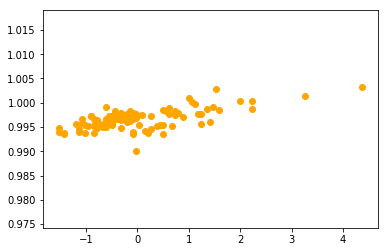

In [10]:
#plt.scatter(x,y,color='blue')
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y,color="orange")
plt.show()

In [11]:
#HYPOTHESIS

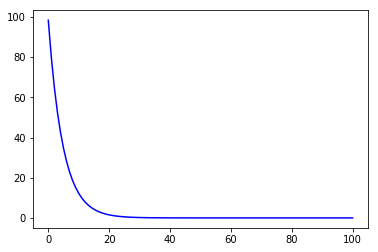

In [49]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    m=X.shape[0]
    error=0
    for i in range(m):
        hp=hypothesis(X[i],theta)
        error+=(hp-Y[i])**2
    return error

def gradient(X,Y,theta):
    
    grad=np.zeros((2,))
    m=X.shape[0]
    
    for i in range(m):
        hp=hypothesis(X[i],theta)
        grad[0]+=(hp-Y[i])
        grad[1]+=(hp-Y[i])*X[i]
        
    return grad

def gradientdesc(X,Y,n=0.001):
    
    theta=np.zeros((2,))
    itr=0
    mitr=100
    errorlist=[]
    thetalist=[]
    while(itr<=mitr):
        grad=gradient(X,Y,theta)
        errorx=error(X,Y,theta)
        errorlist.append(errorx)
        
        thetalist.append((theta[0],theta[1]))
        theta[0]= theta[0] - n*grad[0]
        theta[1]= theta[1] - n*grad[1]
        itr+=1
    #plt.plot(thetalist,color='red')
    return theta,errorlist,thetalist

def exactgradient(X,Y,n=0.001):
    deltae=10
    theta=np.zeros((2,))
    error1=error(X,Y,theta)
    print(error1)
    errorlist=[]
    while(deltae>0.1):
        grad=gradient(X,Y,theta)
        theta[0]= theta[0] - n*grad[0]
        theta[1]= theta[1] - n*grad[1]
        error2=error(X,Y,theta)
        print(error2)
        errorlist.append(error2)
        deltae=error1-error2
        
    return theta,errorlist

finaltheta1,final_err1,theta_list=gradientdesc(X,Y)
#print(final_err1)
#finaltheta2,final_err2=exactgradient(X,Y)
#print(final_err2)
plt.plot(final_err1,color="blue")
#plt.plot(final_err2,color="orange")
plt.show()
    

In [50]:
print(finaltheta1)

[0.99660749 0.0013579 ]


In [51]:
xtest=np.linspace(-2,6,10)
print(xtest)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


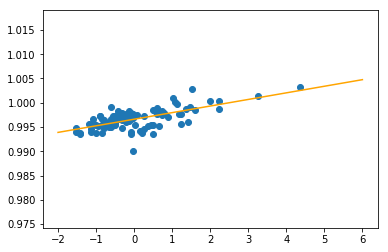

In [52]:
plt.scatter(X,Y)
plt.plot(xtest,hypothesis(xtest,finaltheta1),color='orange')
plt.show()

VISUALIZING GRADIENT DESCENT

In [53]:
from mpl_toolkits.mplot3d import Axes3D

In [54]:
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)

T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T0.shape)
m=T0.shape[0]
n=T1.shape[0]

for i in range (m):
    for j in range(n):
        J[i,j]=np.sum((Y- T1[i,j]*X - T0[i,j])**2)
print(J.shape)


(500, 500)


In [55]:
theta_list=np.array(theta_list)

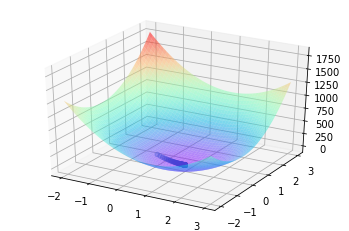

In [59]:

fig=plt.figure()
axes=fig.gca(projection='3d')

axes.scatter(theta_list[:,0],theta_list[:,1],final_err1)
axes.plot_surface(T0,T1,J,cmap='rainbow',alpha=.5)
plt.show()

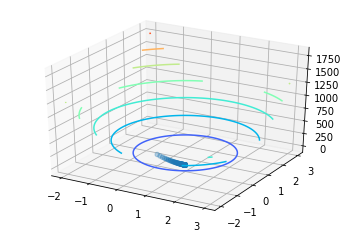

In [60]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.scatter(theta_list[:,0],theta_list[:,1],final_err1)
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

Text(0.5, 1.0, '2D Projection')

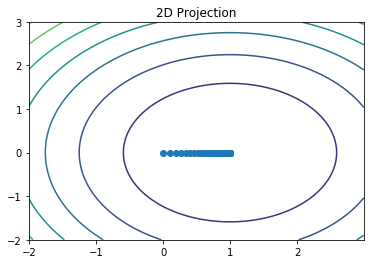

In [61]:
plt.contour(T0,T1,J)
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.title("2D Projection")